# 第四次上机实验
+ 本次实验所需文件
    + `hg19_gene_table.txt`
    + `hg19.chrom.sizes.txt`
> 要求: 不用任何循环语句

1. 对人染色体长度数据 `hg19.chrom.sizes.txt`
    1.用 `read.table` 正确读入数据    

In [126]:
data <- read.table('hg19.chrom.sizes.txt', header = F)

2.最长和最短的染色体分别是哪条? 各多长?

In [127]:
data <- read.table('hg19.chrom.sizes.txt', header = F)
data[which(data$V2 == max(data$V2)),]
data[which(data$V2 == min(data$V2)),]

,V1,V2
,<chr>,<int>
1,chr1,249250621


,V1,V2
,<chr>,<int>
22,chr21,48129895


3.求所有染色体的总长度和平均长度


In [128]:
data <- read.table('hg19.chrom.sizes.txt', header = F)
cat('Length in total', sum(data$V2), '\n')
cat('Average length', mean(data$V2))

Length in total 3095677412 
Average length 128986559

2.用 `read.table` 读入 `hg19.chrom.sizes.txt`

1.用函数 `table` 得到每条染色体上的基因个数, 并画 `barplot`


                 chr1  chr1_gl000191_random  chr1_gl000192_random 
                 5914                     9                     2 
                chr10                 chr11                 chr12 
                 2866                  3473                  2940 
                chr13                 chr14                 chr15 
                 1131                  1892                  2170 
                chr16                 chr17       chr17_ctg5_hap1 
                 2488                  3286                    62 
chr17_gl000205_random                 chr18                 chr19 
                    1                   898                  3837 
chr19_gl000209_random                  chr2                 chr20 
                   18                  4108                  1688 
                chr21                 chr22                  chr3 
                  789                  1280                  3357 
                 chr4        chr4_ctg9_hap1  chr4_gl000193_ra

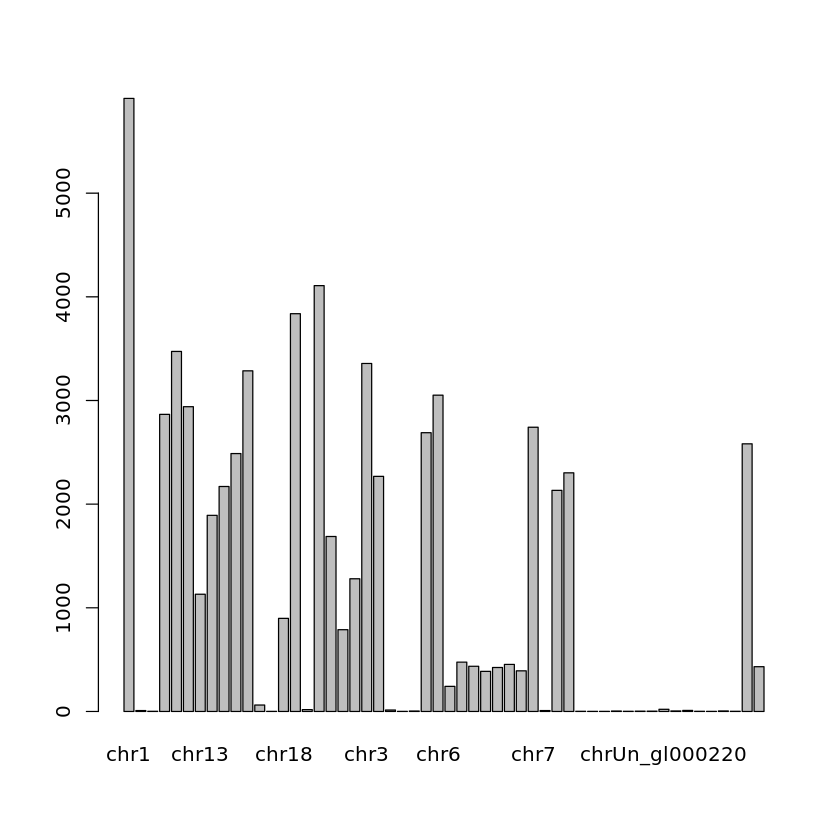

In [129]:
data <- read.table("hg19_gene_table.txt", header = T)
table(data$chrom)
barplot(table(data$chrom))

2.结合染色体长度计算每条染色体上的基因密度(每 Mbp 的基因个数)

In [130]:
data <- read.table("hg19_gene_table.txt", header = T)
chromoLength <- read.table('hg19.chrom.sizes.txt', header = F)
geneNum <- table(data$chrom)
geneNum <- geneNum[as.vector(chromoLength$V1)]
geneNum / (chromoLength$V2 / 1000000)


     chr1      chr2      chr3      chr4      chr5      chr6      chr7      chr8 
23.727122 16.891491 16.952625 11.864762 14.863312 17.830107 17.230257 14.573254 
     chr9     chr10     chr11     chr12     chr13     chr14     chr15     chr16 
16.301566 21.145869 25.724684 21.964575  9.820276 17.624668 21.164250 27.535906 
    chr17     chr18     chr19     chr20     chr22     chr21      chrX      chrY 
40.470368 11.501430 64.892034 26.782802 24.949046 16.393138 16.629038  7.275965 

3.计算基因长度, 绘制基因长度的 `boxplot`

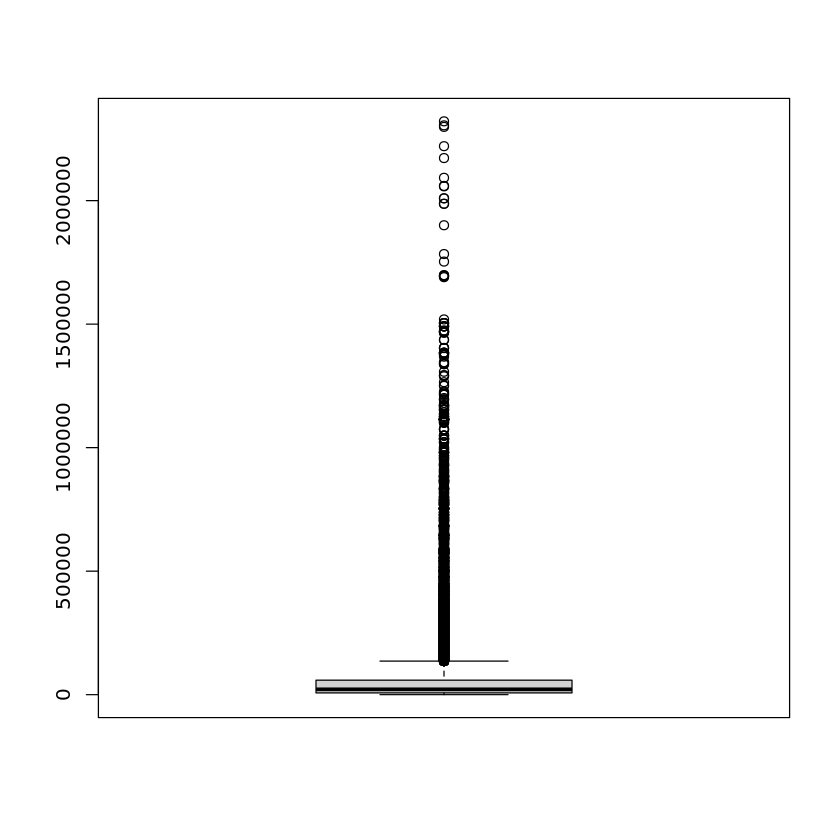

In [131]:
data <- read.table("hg19_gene_table.txt", header = T)
geneLength <- data$txEnd - data$txStart + 1
boxplot(geneLength)

4.找出最长的基因

In [132]:
data <- read.table("hg19_gene_table.txt", header = T)
gene <- cbind(data$geneName,data$txEnd - data$txStart + 1)
gene[which(gene[,2]==max(gene[,2])),]

[1] "ATL1"  "99986"

5.阅读 `cor` 函数的帮助文件, 计算基因长度和外显子个数的相关系数

In [133]:
data <- read.table("hg19_gene_table.txt", header = T)
gene <- cbind(data$txEnd - data$txStart + 1, data$exonCount)
cor(gene[,1], gene[,2])

[1] 0.3760189

6.用 `prop.table` 分染色体计算 +/- strand 上基因的百分比

In [134]:
data <- read.table("hg19_gene_table.txt", header = T)
gene <- table(data$strand)
prop.table(gene)


        -         + 
0.4868818 0.5131182 